In [4]:
import pandas as pd 
from sklearn import preprocessing 
data = pd.read_csv("../datasets/zebra.csv") 
import networkx as nx
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import math
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from modularity_maximization import partition
from modularity_maximization.utils import get_modularity
from modutils import mod_calc
device = torch.device('cpu')

In [5]:
G = nx.Graph()
G.add_edges_from(data.values)

comm_dict = partition(G)
clusters_number = len(np.array(list(set(comm_dict.values()))))

In [3]:
A_hat = nx.adjacency_matrix(G).todense()
X = np.identity(G.number_of_nodes(), dtype=np.float)  

In [4]:
class CDCGS(nn.Module):
    def __init__(self, A_hat, num_feat, num_hidden):
        super(CDCGS, self).__init__()
        self.num_feat = num_feat
        self.num_hidden = num_hidden
        self.A_hat = A_hat
        self.W_0 = nn.Parameter(torch.ones(num_feat, num_hidden))
        I = F.one_hot(torch.tensor(random.sample(range(0, num_feat), num_feat)), num_classes=num_feat)
        self.I = torch.tensor(I,dtype=torch.float)

    def forward(self, X, A_hat,temp):
        global featureSelector
        global weight_feature
        featureSelector = self.W_0
        results = torch.zeros(self.W_0.size())
        x = 500
        for i in range(x):
            results += F.gumbel_softmax(self.W_0,tau=temp,hard=False)
        weight_feature = results/x

        H = torch.mm(torch.mm(self.I,A_hat),self.I.T)
        H = torch.mm(torch.mm(weight_feature.T,A_hat),weight_feature)
        H = torch.div(H, H.sum(axis=0))
        m = nn.Softmax(dim=0)
        return m(H)

num_feat = len(G.nodes())
num_hidden = clusters_number

model = CDCGS(A_hat, num_feat, num_hidden).to(device)

def lossFn(output,exp): 
    return torch.sum((torch.diag(-torch.log(output))))

optimizer = optim.Adam(model.parameters(),lr=1e-2,weight_decay=0,betas=(0.5, 0.999), eps=1e-08)


A_hat_tensor = torch.Tensor(A_hat).to(device)
X_tensor = torch.Tensor(X).to(device)

loss_hist = []
acc_hist = []
temp = 3

for epoch in range(500):
    model.train()
    model.zero_grad()
    if(epoch == 75):
        temp = 2.75
    elif(epoch == 100):
        temp = 2.5
    elif(epoch == 125):
        temp = 2
    elif(epoch == 150):
        temp = 1.8
    elif(epoch == 175):
        temp = 1.25
    elif(epoch == 250):
        temp = 1.00
    elif(epoch == 300):
        temp = 0.75
    elif(epoch == 320):
        temp = 0.50
    elif(epoch == 400):
        temp = 0.2
    output = model(X_tensor, A_hat_tensor,temp)
    loss = lossFn(output,torch.diag(torch.ones(output.size()[0])))
    loss_hist.append(loss.item())
    print('loss',epoch,loss)
    loss.backward()
    optimizer.step()

/opt/anaconda/envs/Deepak/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


loss 0 tensor(3.2958, grad_fn=<SumBackward0>)
loss 1 tensor(3.2958, grad_fn=<SumBackward0>)
loss 2 tensor(3.2958, grad_fn=<SumBackward0>)
loss 3 tensor(3.2959, grad_fn=<SumBackward0>)
loss 4 tensor(3.2958, grad_fn=<SumBackward0>)
loss 5 tensor(3.2958, grad_fn=<SumBackward0>)
loss 6 tensor(3.2958, grad_fn=<SumBackward0>)
loss 7 tensor(3.2958, grad_fn=<SumBackward0>)
loss 8 tensor(3.2958, grad_fn=<SumBackward0>)
loss 9 tensor(3.2957, grad_fn=<SumBackward0>)
loss 10 tensor(3.2956, grad_fn=<SumBackward0>)
loss 11 tensor(3.2956, grad_fn=<SumBackward0>)
loss 12 tensor(3.2955, grad_fn=<SumBackward0>)
loss 13 tensor(3.2953, grad_fn=<SumBackward0>)
loss 14 tensor(3.2953, grad_fn=<SumBackward0>)
loss 15 tensor(3.2950, grad_fn=<SumBackward0>)
loss 16 tensor(3.2947, grad_fn=<SumBackward0>)
loss 17 tensor(3.2947, grad_fn=<SumBackward0>)
loss 18 tensor(3.2942, grad_fn=<SumBackward0>)
loss 19 tensor(3.2940, grad_fn=<SumBackward0>)
loss 20 tensor(3.2937, grad_fn=<SumBackward0>)
loss 21 tensor(3.2934, 

loss 173 tensor(2.5872, grad_fn=<SumBackward0>)
loss 174 tensor(2.5850, grad_fn=<SumBackward0>)
loss 175 tensor(2.3440, grad_fn=<SumBackward0>)
loss 176 tensor(2.3326, grad_fn=<SumBackward0>)
loss 177 tensor(2.3192, grad_fn=<SumBackward0>)
loss 178 tensor(2.3052, grad_fn=<SumBackward0>)
loss 179 tensor(2.2966, grad_fn=<SumBackward0>)
loss 180 tensor(2.2949, grad_fn=<SumBackward0>)
loss 181 tensor(2.2806, grad_fn=<SumBackward0>)
loss 182 tensor(2.2791, grad_fn=<SumBackward0>)
loss 183 tensor(2.2701, grad_fn=<SumBackward0>)
loss 184 tensor(2.2664, grad_fn=<SumBackward0>)
loss 185 tensor(2.2548, grad_fn=<SumBackward0>)
loss 186 tensor(2.2562, grad_fn=<SumBackward0>)
loss 187 tensor(2.2431, grad_fn=<SumBackward0>)
loss 188 tensor(2.2373, grad_fn=<SumBackward0>)
loss 189 tensor(2.2347, grad_fn=<SumBackward0>)
loss 190 tensor(2.2265, grad_fn=<SumBackward0>)
loss 191 tensor(2.2200, grad_fn=<SumBackward0>)
loss 192 tensor(2.2101, grad_fn=<SumBackward0>)
loss 193 tensor(2.2144, grad_fn=<SumBack

loss 344 tensor(1.8124, grad_fn=<SumBackward0>)
loss 345 tensor(1.8095, grad_fn=<SumBackward0>)
loss 346 tensor(1.8113, grad_fn=<SumBackward0>)
loss 347 tensor(1.8106, grad_fn=<SumBackward0>)
loss 348 tensor(1.8079, grad_fn=<SumBackward0>)
loss 349 tensor(1.8048, grad_fn=<SumBackward0>)
loss 350 tensor(1.8078, grad_fn=<SumBackward0>)
loss 351 tensor(1.8072, grad_fn=<SumBackward0>)
loss 352 tensor(1.8089, grad_fn=<SumBackward0>)
loss 353 tensor(1.8136, grad_fn=<SumBackward0>)
loss 354 tensor(1.8109, grad_fn=<SumBackward0>)
loss 355 tensor(1.8092, grad_fn=<SumBackward0>)
loss 356 tensor(1.8077, grad_fn=<SumBackward0>)
loss 357 tensor(1.8106, grad_fn=<SumBackward0>)
loss 358 tensor(1.8100, grad_fn=<SumBackward0>)
loss 359 tensor(1.8070, grad_fn=<SumBackward0>)
loss 360 tensor(1.8061, grad_fn=<SumBackward0>)
loss 361 tensor(1.8070, grad_fn=<SumBackward0>)
loss 362 tensor(1.8089, grad_fn=<SumBackward0>)
loss 363 tensor(1.8059, grad_fn=<SumBackward0>)
loss 364 tensor(1.8113, grad_fn=<SumBack

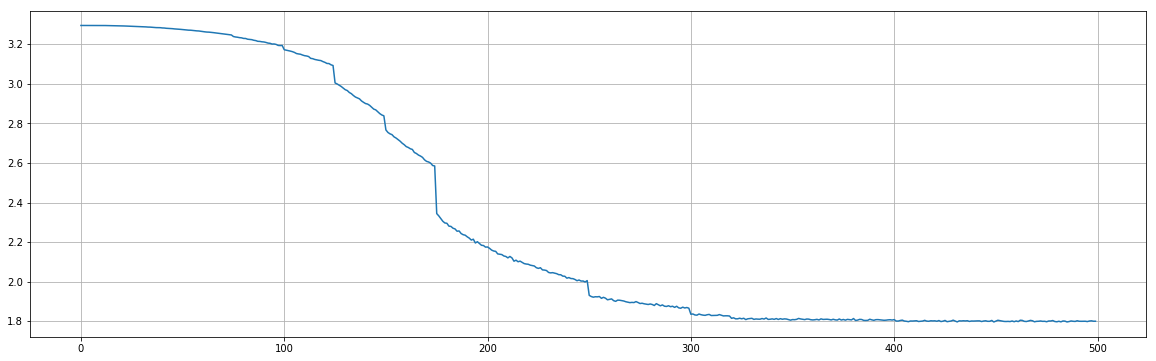

In [5]:
plt.figure(figsize=(20, 6))
plt.plot(loss_hist)
plt.grid(True)
plt.show()

In [6]:
gumbel_matrix = weight_feature.detach().max(dim=1)[1]
labels_pred = gumbel_matrix.data.numpy()

/opt/anaconda/envs/Deepak/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


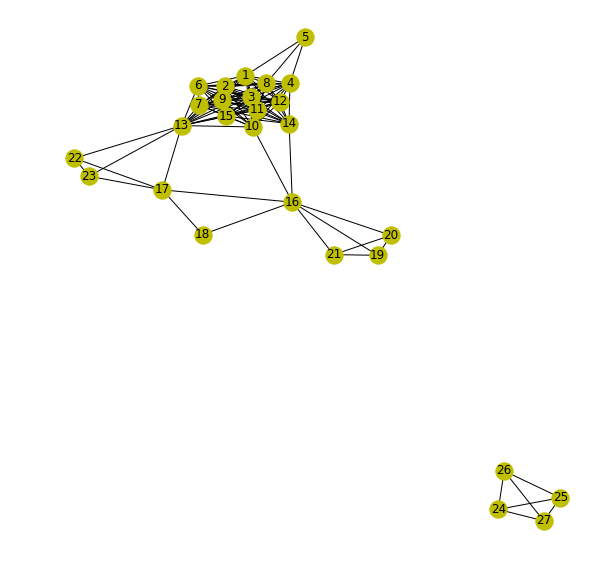

Modularity for Zebra dataset is 0.27023


<Figure size 864x864 with 0 Axes>

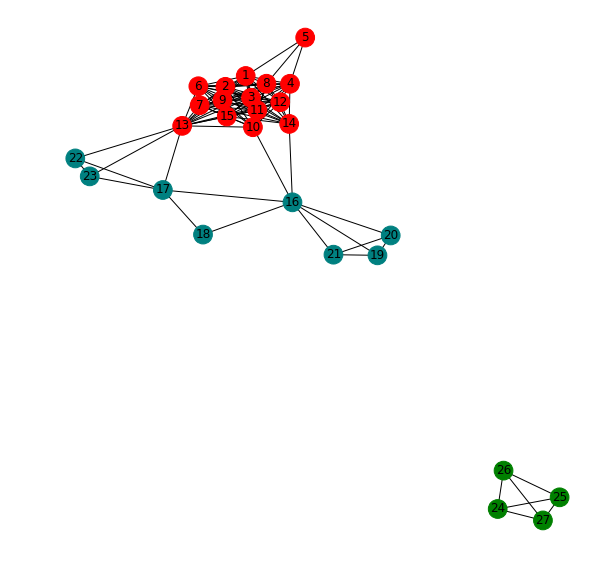

In [7]:
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 10))
plt.axis('off')
nx.draw_networkx(G, pos=pos, node_size=300, node_color="y", with_labels=True)
options = {
    'node_color': 'red',
    'node_size': 50,
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.1,
}
plt.show()

print('Modularity for Zebra dataset is %.5f' %mod_calc(G,'Zebra',labels_pred))
color = []
for c in range(len(gumbel_matrix)):
    if(gumbel_matrix[c] == 0):
        color.append('r')
    elif(gumbel_matrix[c] == 1):
        color.append('g')
    elif(gumbel_matrix[c] == 2):
        color.append('teal')
    elif(gumbel_matrix[c] == 3):
        color.append('greenyellow')
    elif(gumbel_matrix[c] == 4):
        color.append('pink')
    elif(gumbel_matrix[c] == 5):
        color.append('dimgrey')
    elif(gumbel_matrix[c] == 6):
        color.append('peachpuff')
    elif(gumbel_matrix[c] == 7):
        color.append('gold')
    elif(gumbel_matrix[c] == 8):
        color.append('m')
    elif(gumbel_matrix[c] == 9):
        color.append('aqua')
    elif(gumbel_matrix[c] == 10):
        color.append('indianred')
    elif(gumbel_matrix[c] == 11):
        color.append('sienna')
plt.figure(figsize=(12, 12))
options = {
    'node_color': color,
    'node_size': 50,
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.1,
}
plt.figure(figsize=(10, 10))
plt.axis('off')
nx.draw_networkx(G, pos=pos, node_size=350, node_color=color, with_labels=True)
plt.show()


In [7]:
import networkx as nx
from karateclub import MNMF,DANMF,EdMot,GEMSEC,SCD

G.add_edge(20,26)
model3 = EdMot()
model3.fit(G)
cluster_membership3 = model3.get_memberships()
clusters3 = cluster_membership3
labels_pred3 = list(clusters3.values())

print('Modularity of such partition for EdMot is %.6f' %get_modularity(G, labels_pred3))

Calculating modularity for undirected graph
Modularity of such partition for EdMot is 0.216000


In [8]:
model4 = GEMSEC(clusters=clusters_number)
model4.fit(G)
cluster_membership4 = model4.get_memberships()
clusters4 = cluster_membership4
labels_pred4 = list(clusters4.values())
print('Modularity of such partition for GEMSEC is %.6f' %get_modularity(G, labels_pred4))

Calculating modularity for undirected graph
Modularity of such partition for GEMSEC is 0.256417


In [13]:
model5 = SCD()
model5.fit(G)
cluster_membership5 = model5.get_memberships()
clusters5 = cluster_membership5
labels_pred5 = list(clusters5.values())
print('Modularity of such partition for SCD is %.6f' %get_modularity(G, labels_pred5))

Calculating modularity for undirected graph
Modularity of such partition for SCD is 0.196349


In [12]:
model1 = MNMF(clusters=2)
model1.fit(G)
cluster_membership1 = model1.get_memberships()
clusters1 = cluster_membership1
labels_pred1 = list(clusters1.values())
print('Modularity of such partition for MNMF is %.6f' %get_modularity(G, labels_pred1))

Calculating modularity for undirected graph
Modularity of such partition for MNMF is 0.265585


In [11]:
model2 = DANMF(layers=[32, clusters_number])
model2.fit(G)
cluster_membership2 = model2.get_memberships()
clusters2 = cluster_membership2
labels_pred2 = list(clusters2.values())
print('Modularity of such partition for DANMF is %.6f' %get_modularity(G, labels_pred2))

Calculating modularity for undirected graph
Modularity of such partition for DANMF is 0.272202
